## CLIM 680 Project Part 1 (NASA-GISS):
Create a Jupyter noteboook with documentation regarding the datset in question. Read this dataset into the notebook. Make a contour plot of the first time step. Continue applying techniques covered in class to this dataset.

This scripts covers course material including the calculation of anomalies.  These anomalies are then saved, as they are the required data form for subsequent analyses.

In [1]:
##Import necessary python libraries
import warnings;

import numpy as np; ##Numerical Calculations
import xarray as xr; ##Read netcdf files
import pandas as pd;
import matplotlib.pyplot as plt; ##Plotting

import cartopy.crs as ccrs;
import cartopy.mpl.ticker as cticker;
from cartopy.util import add_cyclic_point

## Create and Use a Function

This function inputs a dataset and outputs the climatology by month.

In [2]:
##This function inputs a dataset and outputs monthly climatologies
def monthly_clim( ds ):
    return ds.groupby( 'time.month' ).mean( dim = 'time' );

## Data
The dataset I have chosen for this analysis will be ocean surface temperature data (tos) taken from pre-industrial model runs contained in the CMIP5 dataset.

Due to the multiude of models available for this dataset, only NASA-GISS-E2-H model will be considered.

This dataset is contained on the COLA server at:/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NASA-GISS.GISS-E2-H/r1i1p1

The data is stored in 5 files containing 50 years of data, for a total run length of 250 years. The data is stored using the NetCDF file format.

In [3]:
## Read dataset into notebook   
path = '/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NASA-GISS.GISS-E2-H/r1i1p1/';
#file = 'tos_Omon_GISS-E2-H_piControl_r1i1p1_251001-255912.nc'
mf_file = 'tos_Omon_GISS-E2-H_piControl_r1i1p1_*.nc';
#dataset = xr.open_dataset( path + file )
dataset = xr.open_mfdataset( ( path + mf_file ), concat_dim = 'time' );
print( dataset );
## Note that there is no units attribute for this file.

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 2880)
Coordinates:
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(600, 90, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(600, 144, 2), meta=np.ndarray>
    tos        (time, lat, lon) float32 dask.array<chunksize=(600, 90, 144), meta=np.ndarray>
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          piControl
    source:                 GISS-E2-H-Eh135 Atmosphere: GISS-E2; Ocean: H
    model_id:              

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested`

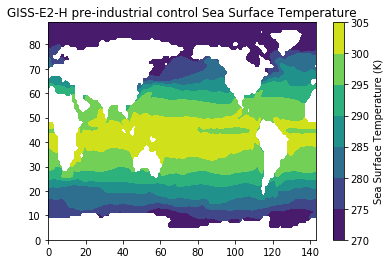

In [4]:
##Make a contour plot of the first time step.
plt.contourf( dataset['tos'][0,:,:] );
plt.title( dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
plt.colorbar( label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );


/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


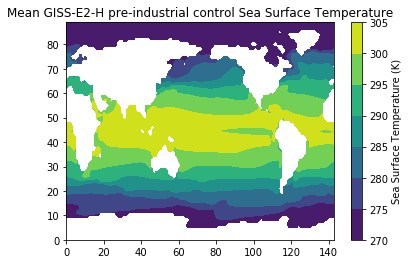

In [5]:
##Plot the average SST over the dataset
dataset_mean = dataset.mean( dim = 'time' );
plt.contourf( dataset_mean['tos'] );
plt.title( 'Mean ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
plt.colorbar( label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


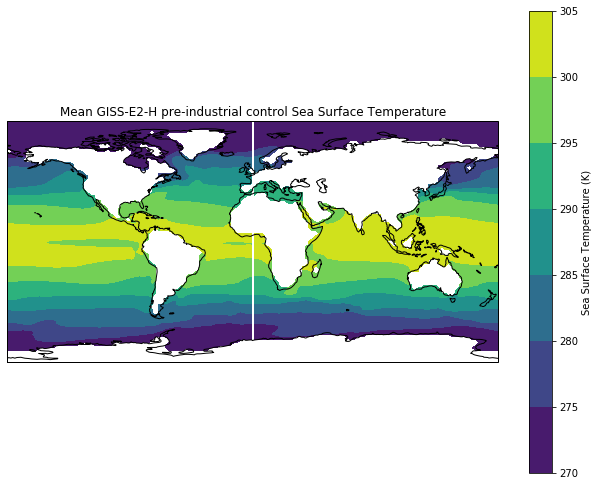

In [6]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( dataset['lon'], dataset['lat'], dataset_mean['tos'], transform = ccrs.PlateCarree() );
plt.title( 'Mean ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );

##Add coastlines
ax.coastlines();

##Add a colorbar
cbar = plt.colorbar( cs, label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

## Remove the 'cyclic point' in the image

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


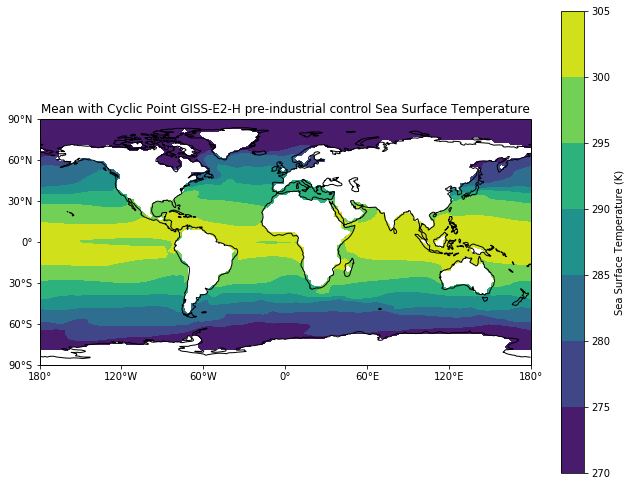

In [7]:
#Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

##Add cyclic point to data
data, lons = add_cyclic_point( dataset_mean['tos'], coord = dataset_mean['lon'] );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['lat'], data, transform = ccrs.PlateCarree() );
plt.title( 'Mean with Cyclic Point ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );

#Add coastlines
ax.coastlines();

#Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

#Define the yticks for the latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

##Add colorbar
cbar = plt.colorbar( cs, label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

## Change the Color Scheme

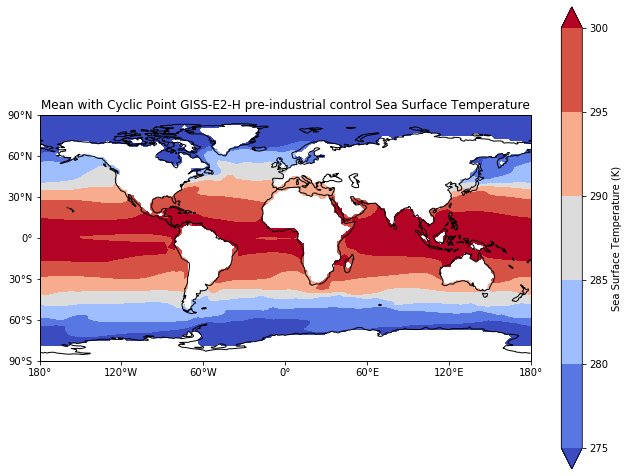

In [8]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['lat'], data, transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );
plt.title( 'Mean with Cyclic Point ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );
##Add coastlines
ax.coastlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

##Add colorbar
cbar = plt.colorbar( cs, label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

## Change the map projection

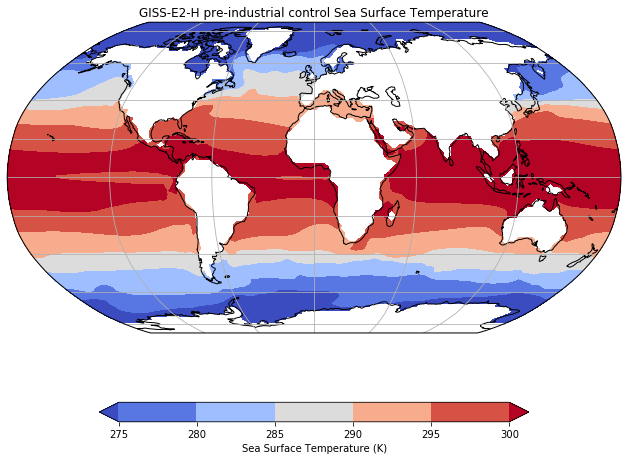

In [9]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.Robinson() );

#Make a filled contour plot
cs = ax.contourf( lons, dataset_mean['lat'], data, transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7, orientation = 'horizontal', label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

#Add title
plt.title( dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );

## Assignment 2:
Apply the techniques covered in class, including longitude shifting, interpolation to a common grid, masking data using boolean arrays, subsetting of data (selecting a reduces set along one dimension), and aggregation (combining data).  Climatology and anomalies should be calculated for some quantity using the groupby() function.  

In [10]:
atmos_path = '/shared/cmip5/data/piControl/atmos/mon/Amon/tas/NASA-GISS.GISS-E2-H/r1i1p1/';
atmos_file = 'tas_Amon_GISS-E2-H_piControl_r1i1p1_2*.nc';
dataset_atmos = xr.open_mfdataset( atmos_path + atmos_file, concat_dim = 'time' );
print( dataset_atmos );
#print( dataset );

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 2880)
Coordinates:
    height     float64 2.0
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(600, 90, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(600, 144, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 90, 144), meta=np.ndarray>
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          piControl
    source:                 GISS-E2-H-Eh135 Atmosphere: GISS-E2; Ocean: H


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the

## Longitude Shifting
The ocean dataset is organized on a longitude grid from -280 to 80 and must be shifted to a 0-360 grid 

In [11]:
new_lon = ( dataset['lon'] + 360 ) % 360;
dataset = dataset.assign_coords( lon = new_lon );
dataset = dataset.sortby( dataset['lon'] );
print( dataset );

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 2880)
Coordinates:
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(600, 90, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(600, 144, 2), meta=np.ndarray>
    tos        (time, lat, lon) float32 dask.array<chunksize=(600, 90, 144), meta=np.ndarray>
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          piControl
    source:                 GISS-E2-H-Eh135 Atmosphere: GISS-E2; Ocean: H
    model_id:              

## Interpolatation using interp_like()
Interpolate the ocean file to the atmospheric grid.  Due to the interp_like function matching variables by name, the dimension and data variables must be renamed in the atmospheric file.

In [12]:
dataset_interptoatmos = dataset.interp_like( dataset_atmos );
print( dataset_interptoatmos );

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 2880)
Coordinates:
  * time       (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(600, 90, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(600, 144, 2), meta=np.ndarray>
    tos        (time, lat, lon) float32 dask.array<chunksize=(600, 90, 144), meta=np.ndarray>
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          piControl
    source:                 GISS-E2-H-Eh135 Atmosphere: GISS-E2; Ocean: H
    model_id:              

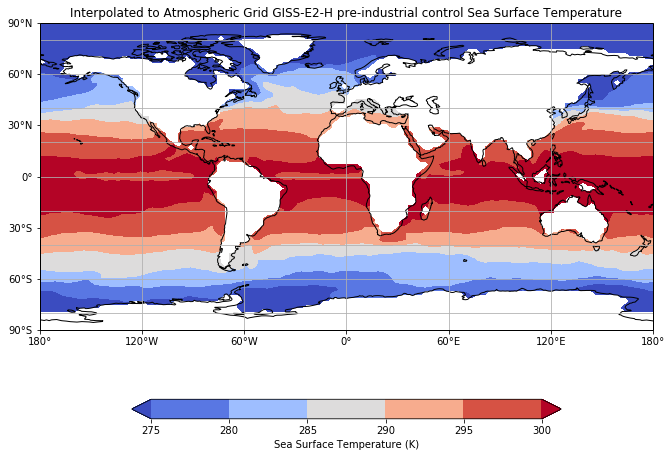

In [13]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

data, lons = add_cyclic_point( dataset['tos'][0,:,:], coord = dataset['lon'] );

#Make a filled contour plot
cs = ax.contourf( lons, dataset['lat'], data, transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7, orientation = 'horizontal', label = dataset['tos'].attrs['long_name'] + ' (' + dataset['tos'].attrs['units'] + ')' );

#Add title
plt.title( 'Interpolated to Atmospheric Grid ' + dataset.attrs['model_id'] + ' ' + dataset.attrs['experiment'] + ' ' + dataset['tos'].attrs['long_name'] );


## Masking
Load a masking file, interpolate it to the atmospheric file, and mask out the land surface from the atmospheric dataset. 

In [14]:
#Data has been added over the land. We can mask the land regions out.
mask_file = '/shared/obs/gridded/OISSTv2/lmask/lsmask.nc';
mask = xr.open_dataset( mask_file );
mask = mask.reindex( lat = list( reversed( mask['lat'] ) ) );
#mask = mask.rename( {'lat':'rlat', 'lon':'rlon', 'mask':'tos'} );
mask = mask.squeeze();
print( mask );

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     datetime64[ns] 1981-10-29
Data variables:
    mask     (lat, lon) float32 ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Created 10/2002 by RHS
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/


In [15]:
mask_interptoatmos = mask.interp_like( dataset_atmos );
print( mask_interptoatmos );

<xarray.Dataset>
Dimensions:  (lat: 90, lon: 144)
Coordinates:
    time     datetime64[ns] 1981-10-29
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    mask     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Created 10/2002 by RHS
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/


In [16]:
atmos_masked = dataset_atmos['tas'].where( mask_interptoatmos['mask'] == 1 )
print( atmos_masked );

<xarray.DataArray 'tas' (time: 2880, lat: 90, lon: 144)>
dask.array<where, shape=(2880, 90, 144), dtype=float32, chunksize=(600, 90, 144)>
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_name:     dummy
    cell_methods:      time: mean
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...


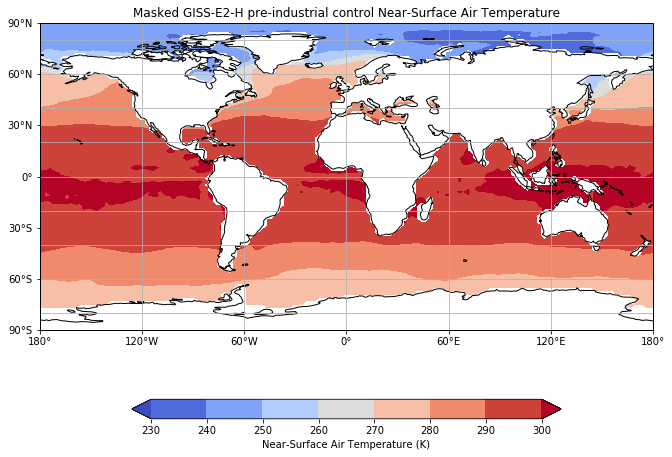

In [17]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

##Create data to fill the missing cyclic point
data, lons = add_cyclic_point( atmos_masked[0,:,:,], coord = atmos_masked['lon'] );

#Make a filled contour plot
cs = ax.contourf( lons,
                 atmos_masked['lat'],
                 data,
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = dataset_atmos['tas'].attrs['long_name'] + ' (' + dataset_atmos['tas'].attrs['units'] + ')' );

#Add title
plt.title( 'Masked ' + dataset_atmos.attrs['model_id'] + ' ' + dataset_atmos.attrs['experiment'] + ' ' + dataset_atmos['tas'].attrs['long_name'] );


In [18]:
##Just for fun plot a difference in tos and tas
atmosocn_diff = atmos_masked - dataset_interptoatmos['tos'];
atmosocn_diff 

<xarray.DataArray (time: 2880, lat: 90, lon: 144)>
dask.array<sub, shape=(2880, 90, 144), dtype=float32, chunksize=(600, 90, 144)>
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00

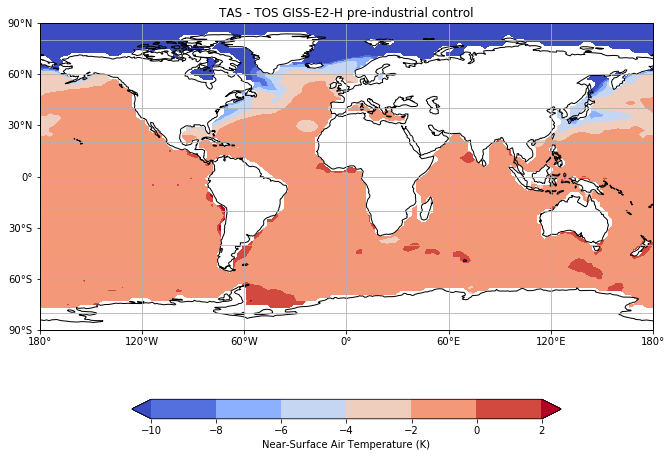

In [19]:
clevs = np.arange( -10, 4, 2 );

##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

data, lons = add_cyclic_point( atmosocn_diff[0,:,:,], coord = atmosocn_diff['lon'] );

#Make a filled contour plot
cs = ax.contourf( lons,
                 atmosocn_diff['lat'],
                 data, clevs,
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = dataset_atmos['tas'].attrs['long_name'] + ' (' + dataset_atmos['tas'].attrs['units'] + ')' );

#Add title
plt.title( 'TAS - TOS ' + dataset_atmos.attrs['model_id'] + ' ' + dataset_atmos.attrs['experiment'] );


For most of the globe, the difference between the surface air temperature (TAS) and the sea surface temperature (TOS) is small.  The largest differences occur in regions of strong boundary currents (Gulf Stream and Kuroshio), where differences in temperature are due to the slow speed of heat exchange compared to transport, and in regions of sea ice, where the ice is preventing heat exchange at the surface.

## Subsetting
Extract a subset of the ocean data corresponding to the North Atlantic.

In [20]:
dataset_na = dataset.sel( lat = slice( 0, 60 ),
                         lon = slice( 360-75, 360 ) );
print( dataset_na );

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, lon: 30, time: 2880)
Coordinates:
  * lat        (lat) float64 1.0 3.0 5.0 7.0 9.0 ... 51.0 53.0 55.0 57.0 59.0
  * lon        (lon) float64 286.2 288.8 291.2 293.8 ... 351.2 353.8 356.2 358.8
  * time       (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(600, 30, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(600, 30, 2), meta=np.ndarray>
    tos        (time, lat, lon) float32 dask.array<chunksize=(600, 30, 30), meta=np.ndarray>
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          piControl
    source:                 GISS-E2-H-Eh135 Atmosphere: GISS-E2; Ocean: H
    model_id:            

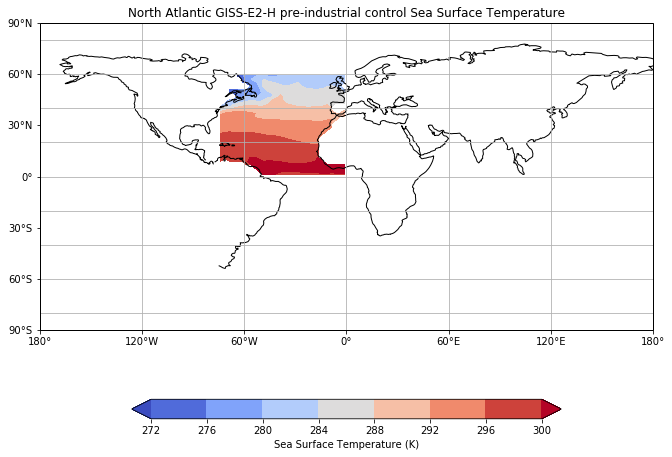

In [21]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( dataset_na['lon'],
                 dataset_na['lat'],
                 dataset_na['tos'][0,:,:,],
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = dataset_na['tos'].attrs['long_name'] + ' (' + dataset_na['tos'].attrs['units'] + ')' );

#Add title
plt.title( 'North Atlantic ' + dataset_na.attrs['model_id'] + ' ' + dataset_na.attrs['experiment'] + ' ' + dataset_na['tos'].attrs['long_name'] );

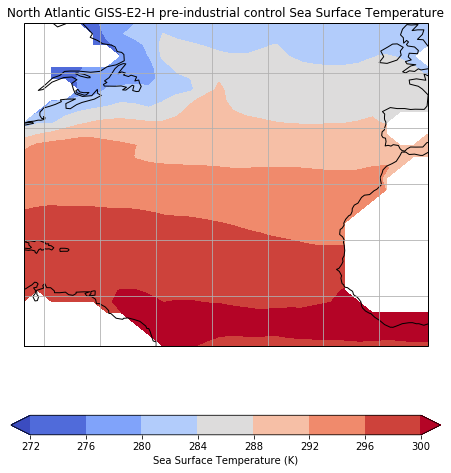

In [22]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( dataset_na['lon'],
                 dataset_na['lat'],
                 dataset_na['tos'][0,:,:,],
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
#ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
#lon_formatter = cticker.LongitudeFormatter();
#ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
#ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
#lat_formatter = cticker.LatitudeFormatter();
#ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = dataset_na['tos'].attrs['long_name'] + ' (' + dataset_na['tos'].attrs['units'] + ')' );

#Add title
plt.title( 'North Atlantic ' + dataset_na.attrs['model_id'] + ' ' + dataset_na.attrs['experiment'] + ' ' + dataset_na['tos'].attrs['long_name'] );

## Aggregate 
Calculate the area average over the North Atlantic Ocean

<xarray.DataArray 'tos' (time: 2880)>
dask.array<mean_agg-aggregate, shape=(2880,), dtype=float32, chunksize=(600,)>
Coordinates:
  * time     (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00


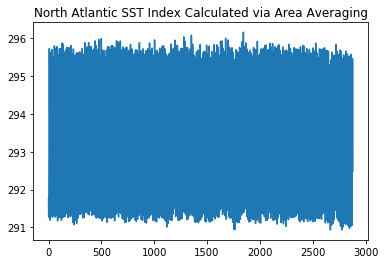

In [23]:
nasst_ind = dataset_na['tos'].mean( dim = ( 'lat', 'lon' ) );
print( nasst_ind );
plt.plot( nasst_ind );
plt.title( 'North Atlantic SST Index Calculated via Area Averaging' );

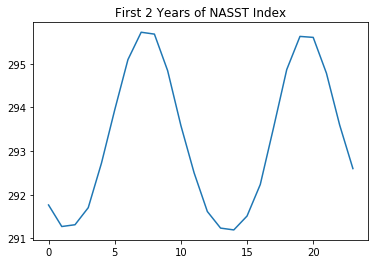

In [24]:
plt.plot( nasst_ind[0:24] );
plt.title( 'First 2 Years of NASST Index' );

## Climatology
Calculate the annual climatology of global SST and NASST Index.  Similarly calculate the annual climatology of the NASST region.

In [25]:
##Calculate the monthly climatology for the global SST
sst_clim = monthly_clim( dataset_interptoatmos );
sst_clim

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 90, lon: 144, month: 12)
Coordinates:
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (month, lat, bnds) float64 dask.array<chunksize=(1, 90, 2), meta=np.ndarray>
    lon_bnds  (month, lon, bnds) float64 dask.array<chunksize=(1, 144, 2), meta=np.ndarray>
    tos       (month, lat, lon) float32 dask.array<chunksize=(1, 90, 144), meta=np.ndarray>

## Create a set of subplots that span each monthly climatology

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packag

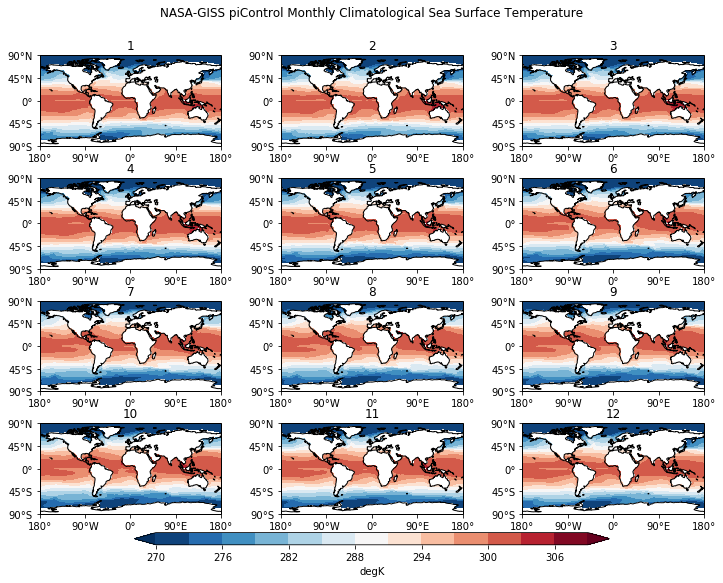

In [26]:
clevs = np.arange( 270, 310, 3 );

fig,axs = plt.subplots( nrows = 4, ncols = 3,
                      subplot_kw = {'projection':ccrs.PlateCarree() },
                      figsize = ( 11, 8.5) );
axs = axs.flatten();

for i,mon in enumerate(  sst_clim['month'] ):
    
    data, lons = add_cyclic_point( sst_clim['tos'].sel( month = mon ), coord = sst_clim['lon'] );
    
    cs = axs[i].contourf( lons, sst_clim['lat'],
                        data,
                        clevs, transform = ccrs.PlateCarree(),
                        cmap = 'RdBu_r', extend = 'both' );
    #Longitude Labels
    axs[i].set_xticks( np.arange( -180, 181, 90 ), crs = ccrs.PlateCarree() );
    lon_formatter = cticker.LongitudeFormatter();
    axs[i].xaxis.set_major_formatter( lon_formatter );
    
    #Latitude Labels 
    axs[i].set_yticks( np.arange( -90, 91, 45 ), crs = ccrs.PlateCarree() );
    lat_formatter = cticker.LatitudeFormatter();
    axs[i].yaxis.set_major_formatter( lat_formatter );
    
    axs[i].coastlines();
    axs[i].set_title( mon.values );

#Reduce space between figures and leave space for a colorbar
fig.subplots_adjust( bottom = 0.15, top = 0.9,
                  left = 0.05, right = 0.95,
                  wspace = 0.05, hspace = 0.35)
cbar_ax = fig.add_axes( [0.2, 0.1, 0.6, 0.02] );
cbar = fig.colorbar( cs, cax = cbar_ax, orientation = 'horizontal',
                   label = 'degK' );
plt.suptitle( dataset.attrs['institute_id'] + ' ' + dataset.attrs['experiment_id'] + ' ' + 'Monthly Climatological Sea Surface Temperature' );

<xarray.DataArray 'tos' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,)>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


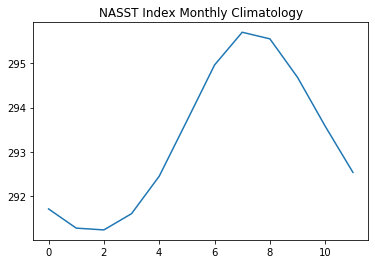

In [27]:
nasst_ind_clim = monthly_clim( nasst_ind );
print( nasst_ind_clim );
plt.plot( nasst_ind_clim );
plt.title( 'NASST Index Monthly Climatology' );

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 30, lon: 30, month: 12)
Coordinates:
  * lat       (lat) float64 1.0 3.0 5.0 7.0 9.0 ... 51.0 53.0 55.0 57.0 59.0
  * lon       (lon) float64 286.2 288.8 291.2 293.8 ... 351.2 353.8 356.2 358.8
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (month, lat, bnds) float64 dask.array<chunksize=(1, 30, 2), meta=np.ndarray>
    lon_bnds  (month, lon, bnds) float64 dask.array<chunksize=(1, 30, 2), meta=np.ndarray>
    tos       (month, lat, lon) float32 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>


/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


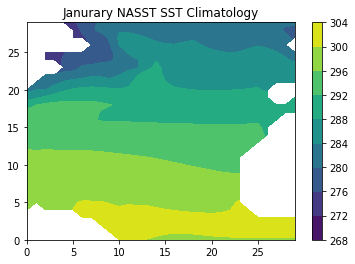

In [28]:
nasst_clim = monthly_clim( dataset_na );
print( nasst_clim );
plt.contourf( nasst_clim['tos'][0,:,:] );
plt.colorbar( );
plt.title( 'Janurary NASST SST Climatology' );

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


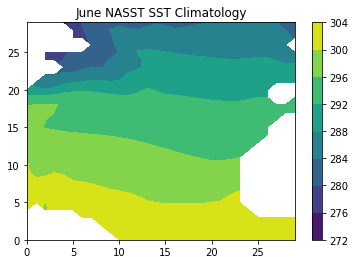

In [29]:
plt.contourf( nasst_clim['tos'][5,:,:] );
plt.colorbar( );
plt.title( 'June NASST SST Climatology' );

## Create a set of subplots that span each monthly climatology

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/anaconda3/lib/python3.7/site-packag

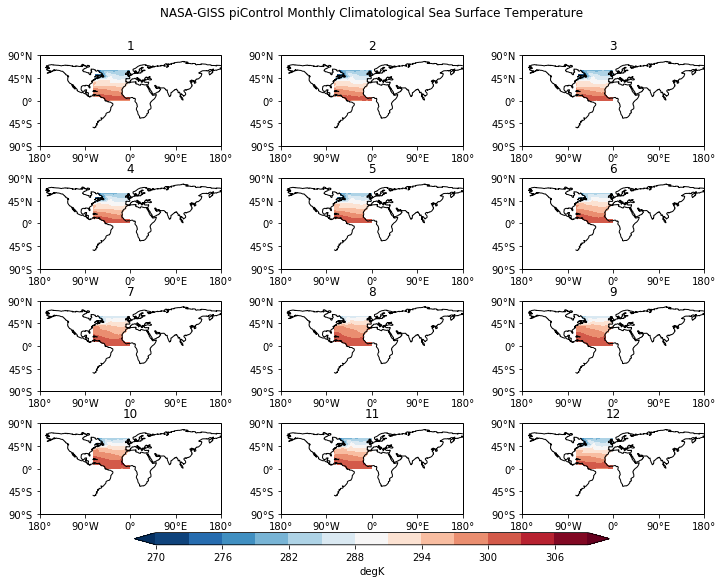

In [30]:
clevs = np.arange( 270, 310, 3 );

fig,axs = plt.subplots( nrows = 4, ncols = 3,
                      subplot_kw = {'projection':ccrs.PlateCarree() },
                      figsize = ( 11, 8.5) );
axs = axs.flatten();

for i,mon in enumerate(  nasst_clim['month'] ):
    cs = axs[i].contourf( nasst_clim['lon'], nasst_clim['lat'],
                        nasst_clim['tos'].sel( month = mon ),
                        clevs, transform = ccrs.PlateCarree(),
                        cmap = 'RdBu_r', extend = 'both' );
    #Longitude Labels
    axs[i].set_xticks( np.arange( -180, 181, 90 ), crs = ccrs.PlateCarree() );
    lon_formatter = cticker.LongitudeFormatter();
    axs[i].xaxis.set_major_formatter( lon_formatter );
    
    #Latitude Labels 
    axs[i].set_yticks( np.arange( -90, 91, 45 ), crs = ccrs.PlateCarree() );
    lat_formatter = cticker.LatitudeFormatter();
    axs[i].yaxis.set_major_formatter( lat_formatter );
    
    axs[i].coastlines();
    axs[i].set_title( mon.values );

#Reduce space between figures and leave space for a colorbar
fig.subplots_adjust( bottom = 0.15, top = 0.9,
                  left = 0.05, right = 0.95,
                  wspace = 0.05, hspace = 0.35)
cbar_ax = fig.add_axes( [0.2, 0.1, 0.6, 0.02] );
cbar = fig.colorbar( cs, cax = cbar_ax, orientation = 'horizontal',
                   label = 'degK' );
plt.suptitle( dataset.attrs['institute_id'] + ' ' + dataset.attrs['experiment_id'] + ' ' + 'Monthly Climatological Sea Surface Temperature' );

## Anomalies
Use the calculated climatologies to calculate the anomalies in the NASST index

In [31]:
nasst_ind_anom = nasst_ind.groupby( 'time.month' ) - nasst_ind_clim;
print( nasst_ind_anom );

<xarray.DataArray 'tos' (time: 2880)>
dask.array<getitem, shape=(2880,), dtype=float32, chunksize=(1,)>
Coordinates:
  * time     (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12


/opt/anaconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1325: PerformanceWarning: Slicing with an out-of-order index is generating 48 times more chunks
  return self.array[key]


In [32]:
nasst_anom = dataset_na.groupby( 'time.month' ) - nasst_clim;
print( nasst_anom );

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 30, lon: 30, time: 2880)
Coordinates:
  * lat       (lat) float64 1.0 3.0 5.0 7.0 9.0 ... 51.0 53.0 55.0 57.0 59.0
  * lon       (lon) float64 286.2 288.8 291.2 293.8 ... 351.2 353.8 356.2 358.8
  * time      (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (time, lat, bnds) float64 dask.array<chunksize=(1, 30, 2), meta=np.ndarray>
    lon_bnds  (time, lon, bnds) float64 dask.array<chunksize=(1, 30, 2), meta=np.ndarray>
    tos       (time, lat, lon) float32 dask.array<chunksize=(1, 30, 30), meta=np.ndarray>


/opt/anaconda3/lib/python3.7/site-packages/xarray/core/indexing.py:1325: PerformanceWarning: Slicing with an out-of-order index is generating 48 times more chunks
  return self.array[key]


In [33]:
nasst_anom_ind = nasst_anom.mean( dim = ( 'lat', 'lon' ) );
print( nasst_anom_ind );

<xarray.Dataset>
Dimensions:   (bnds: 2, time: 2880)
Coordinates:
  * time      (time) object 2410-01-16 12:00:00 ... 2649-12-16 12:00:00
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (time, bnds) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds  (time, bnds) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    tos       (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>


/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


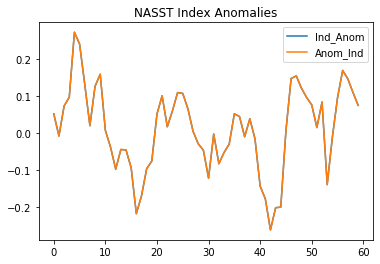

In [34]:
##Compare the NASST Index anomalies calculated in the methods
plt.plot( nasst_ind_anom[0:60] );
plt.plot( nasst_anom_ind['tos'][0:60] );
plt.title( 'NASST Index Anomalies' );
plt.legend( labels = ( 'Ind_Anom', 'Anom_Ind' ) );
##Anomalies overlap (orange is the second color, demonstrating the lack of difference between computing anomlies in different orders

/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:37: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


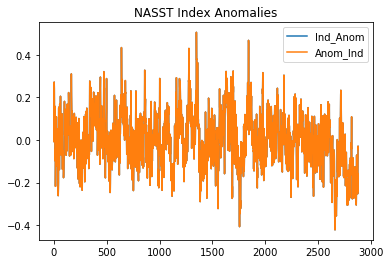

In [35]:
plt.plot( nasst_ind_anom );
plt.plot( nasst_anom_ind['tos'] );
plt.title( 'NASST Index Anomalies' );
plt.legend( labels = ( 'Ind_Anom', 'Anom_Ind' ) );

In both preceding graphs, the overlap of the blue and orange lines demonstrate the equivalence of finding index anomalies via removing climatology at the grid point, or calculating the index from raw data and then removing the climatology of the index.